In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

# Compiler

In [69]:
compiler_results_csv = pd.read_csv('processed twitter data/compiler_results.csv')
compiler_results_list = creator_results_csv['Processed'].tolist()

In [70]:
tokenizer = RegexpTokenizer(r'\w+')

compiler_words = []
for tweet_text in compiler_results_list:
    if type(tweet_text) == type("string"):
        tokens = tokenizer.tokenize(tweet_text)
        compiler_words.append(tokens)

In [71]:
for i in compiler_words:
    for j in i:
        if j in stopwords_LDA:
            i.remove(j)
print("done")

done


In [72]:
compiler_dict = {}

for tweet in compiler_words:
    count = 0
    for i in range(count,len(tweet)):
        count += 1
        for j in range(count,len(tweet)):
            
            if (tweet[i],tweet[j]) in compiler_dict:
                compiler_dict[(tweet[i],tweet[j])] += 1
                
            elif (tweet[j],tweet[i]) in compiler_dict:
                compiler_dict[(tweet[j],tweet[i])] += 1
                
            else:
                compiler_dict[(tweet[i],tweet[j])] = 1
compiler_dict

{('inspired', 'profound'): 1,
 ('inspired', 'desire'): 1,
 ('inspired', 'explore'): 1,
 ('inspired', 'new'): 6,
 ('inspired', 'playgrounds'): 1,
 ('inspired', 'vault'): 1,
 ('inspired', 'recently'): 1,
 ('inspired', 'chose'): 1,
 ('inspired', 'acquire'): 1,
 ('inspired', 'parcels'): 1,
 ('inspired', 'land'): 1,
 ('inspired', 'sandbox'): 1,
 ('inspired', 'voxel'): 2,
 ('inspired', 'bespoke'): 1,
 ('inspired', 'world'): 37,
 ('inspired', 'eclectic'): 1,
 ('inspired', 'space'): 7,
 ('inspired', 'fostering'): 1,
 ('inspired', 'boundary'): 1,
 ('inspired', 'pushing'): 1,
 ('inspired', 'creativity'): 1,
 ('profound', 'desire'): 1,
 ('profound', 'explore'): 1,
 ('profound', 'new'): 1,
 ('profound', 'playgrounds'): 1,
 ('profound', 'vault'): 1,
 ('profound', 'recently'): 1,
 ('profound', 'chose'): 1,
 ('profound', 'acquire'): 1,
 ('profound', 'parcels'): 1,
 ('profound', 'land'): 1,
 ('profound', 'sandbox'): 1,
 ('profound', 'voxel'): 2,
 ('profound', 'bespoke'): 1,
 ('profound', 'world'): 1,


In [73]:
bigram_df_c = pd.DataFrame(compiler_dict.items(), columns=['bigram', 'count'])

In [75]:
df = bigram_df_c.copy()

word1 = []
word2 = []
for i, j in df['bigram']:
    word1.append(i) 
    word2.append(j)
    
df['word1']=word1
df['word2']=word2
df

,bigram,count,word1,word2
0,"(inspired, profound)",1,inspired,profound
1,"(inspired, desire)",1,inspired,desire
2,"(inspired, explore)",1,inspired,explore
3,"(inspired, new)",6,inspired,new
4,"(inspired, playgrounds)",1,inspired,playgrounds
...,...,...,...,...
184275,"(holiday, little)",1,holiday,little
184276,"(holiday, love)",1,holiday,love
184277,"(message, little)",1,message,little
184278,"(message, love)",1,message,love


In [90]:
#to_remove=[]

list_comp = []

for x in range(len(df['count'])):
    if df.iloc[x][1] > 5:
        to_add = [df.iloc[x][2], df.iloc[x][3], str(df.iloc[x][1])]
        list_comp.append(to_add)


In [91]:
list_comp

[['inspired', 'new', '6'],
 ['inspired', 'world', '37'],
 ['inspired', 'space', '7'],
 ['new', 'world', '19'],
 ['new', 'space', '15'],
 ['world', 'space', '6'],
 ['web3', 'physical', '11'],
 ['web3', 'digital', '26'],
 ['web3', 'new', '50'],
 ['web3', 'future', '9'],
 ['deep', 'digital', '6'],
 ['physical', 'digital', '97'],
 ['physical', 'create', '12'],
 ['physical', 'new', '16'],
 ['physical', 'future', '7'],
 ['digital', 'assets', '10'],
 ['digital', 'different', '7'],
 ['digital', 'create', '17'],
 ['digital', 'new', '25'],
 ['digital', 'future', '25'],
 ['new', 'future', '8'],
 ['drop', 'exclusive', '8'],
 ['drop', 'designed', '7'],
 ['exclusive', 'designed', '10'],
 ['announce', 'join', '6'],
 ['launch', 'space', '9'],
 ['launch', 'open', '10'],
 ['launch', 'community', '16'],
 ['space', 'community', '18'],
 ['space', 'join', '11'],
 ['community', 'join', '18'],
 ['time', 'space', '6'],
 ['time', 'drop', '11'],
 ['space', 'created', '6'],
 ['space', 'drop', '7'],
 ['created', '

In [92]:
for i in list_comp:
    if i[0] == 6 or i[1] == 6:
        print (i)

In [93]:
G = nx.Graph()
G.add_weighted_edges_from(list_comp)

In [94]:
highest_weights = sorted(G.edges(data=True), key=lambda t: t[2].get('weight'),reverse=True)
highest_weights[:3]

[('physical', 'digital', {'weight': '97'}),
 ('gaming', 'digitalax', {'weight': '93'}),
 ('content', 'unlockable', {'weight': '92'})]

TypeError: bad operand type for unary -: 'str'

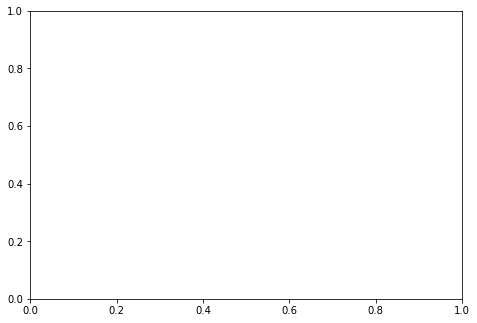

In [95]:
edges = G.edges()
nx.draw(G, with_labels=True, node_size=2000, node_color='r', font_size=10, font_weight='bold')

In [96]:
nx.write_gml(G,"compiler.gml")

In [54]:
import networkx as nx

df_network = nx.from_pandas_edgelist(df,source='word1', target='word2', edge_attr=["count"], create_using=nx.DiGraph())
nx.write_graphml(df_network,'tweet_compiler.graphml') 

# Creator + Media

In [2]:
media_results_csv = pd.read_csv('processed twitter data/media_results.csv')
creator_results_csv = pd.read_csv('processed twitter data/creator_results.csv')

In [3]:
media_results_list = media_results_csv['Processed'].tolist()
creator_results_list = creator_results_csv['Processed'].tolist()

In [4]:
all_list = media_results_list + creator_results_list

In [5]:
all_list

['launches frequent brands including gucci adidas launching according new data retail consumers across uk us still unaware applications benefits',
 'launches frequent brands like launching according new data consumers uk us still unaware applications benefits story',
 'positioned physical influencer creator hub 1 2 million square foot emcee studio opening downtown l later part emcees expansion',
 'marketers discussed ways among topics digiday medias cmo summit',
 'positioned physical influencer creator hub 1 2 million square foot emcee studio opening downtown l later part emcees expansion story',
 'latest hire styling track record daphne guinness story',
 'delving skin market collection marries utility luxury design move suggests could become go path industry veterans story',
 'january dtc underwear brand meundies posted twitter joined collection bored ape yacht club reaction company received less positive story',
 'complete influencers product launches branded beauty event come story'

In [6]:
tokenizer = RegexpTokenizer(r'\w+')

all_words = []
for tweet_text in all_list:
    if type(tweet_text) == type("string"):
        tokens = tokenizer.tokenize(tweet_text)
        all_words.append(tokens)

In [7]:
all_words

[['launches',
  'frequent',
  'brands',
  'including',
  'gucci',
  'adidas',
  'launching',
  'according',
  'new',
  'data',
  'retail',
  'consumers',
  'across',
  'uk',
  'us',
  'still',
  'unaware',
  'applications',
  'benefits'],
 ['launches',
  'frequent',
  'brands',
  'like',
  'launching',
  'according',
  'new',
  'data',
  'consumers',
  'uk',
  'us',
  'still',
  'unaware',
  'applications',
  'benefits',
  'story'],
 ['positioned',
  'physical',
  'influencer',
  'creator',
  'hub',
  '1',
  '2',
  'million',
  'square',
  'foot',
  'emcee',
  'studio',
  'opening',
  'downtown',
  'l',
  'later',
  'part',
  'emcees',
  'expansion'],
 ['marketers',
  'discussed',
  'ways',
  'among',
  'topics',
  'digiday',
  'medias',
  'cmo',
  'summit'],
 ['positioned',
  'physical',
  'influencer',
  'creator',
  'hub',
  '1',
  '2',
  'million',
  'square',
  'foot',
  'emcee',
  'studio',
  'opening',
  'downtown',
  'l',
  'later',
  'part',
  'emcees',
  'expansion',
  'story

In [8]:
stopwords_LDA = ["go","m","pm","look","soon","start","let","yet","full","still","good","know","much", "well", 
                 "wait","try","thank","dm","lol","hit","put","ve","send","give","going","dude","stuff","get","got","l","p","10",
                 "co","gm","b","haha","work","many","hard","thing","make","next","come","fam","even","gt","1","2","3","4","5","6","7","8","9","pst",
                 "cet","est","wont","irl","100","u","x","via","hey","w","utc","worldhealthday2021","0","may","000","00","12","yes","30","24","et","1155",
                "50","20","im","15","e","7pm","vs","6pm","28","z","3pm","721","12pm","2nd","16","11","13","af","oh","17","thats","rt","30pm","8pm","21",
                 "theres","11am","17th","26","5pm","lp","youll","check","like","today","part","ever","need","every","lets","already","twitter",
                 "use","sure","something","please","tomorrow","us","see","across","pode","matic","way","fine","stay","nhs","within","might","10th",
                 "wanna","18","101","etc","per","says","came","sorry","thanks","including","another","set","able","back","left","become","gonna",
                 "comes","tonight","end","must","done","true","working","guys","never","seen","else","actually","retweet","really","200","23",
                "whose","ways","goo","led","appears","lil","till","wow","tweet","week","get","hope"]

In [9]:
for i in all_words:
    for j in i:
        if j in stopwords_LDA:
            i.remove(j)
print("done")

done


In [10]:
all_dict = {}

for tweet in all_words:
    count = 0
    for i in range(count,len(tweet)):
        count += 1
        for j in range(count,len(tweet)):
            
            if (tweet[i],tweet[j]) in all_dict:
                all_dict[(tweet[i],tweet[j])] += 1
                
            elif (tweet[j],tweet[i]) in all_dict:
                all_dict[(tweet[j],tweet[i])] += 1
                
            else:
                all_dict[(tweet[i],tweet[j])] = 1

all_dict

{('launches', 'frequent'): 2,
 ('launches', 'brands'): 3,
 ('launches', 'gucci'): 6,
 ('launches', 'adidas'): 1,
 ('launches', 'launching'): 3,
 ('launches', 'according'): 2,
 ('launches', 'new'): 4,
 ('launches', 'data'): 2,
 ('launches', 'retail'): 1,
 ('launches', 'consumers'): 2,
 ('launches', 'uk'): 2,
 ('launches', 'still'): 2,
 ('launches', 'unaware'): 2,
 ('launches', 'applications'): 2,
 ('launches', 'benefits'): 3,
 ('frequent', 'brands'): 2,
 ('frequent', 'gucci'): 1,
 ('frequent', 'adidas'): 1,
 ('frequent', 'launching'): 2,
 ('frequent', 'according'): 2,
 ('frequent', 'new'): 2,
 ('frequent', 'data'): 2,
 ('frequent', 'retail'): 1,
 ('frequent', 'consumers'): 2,
 ('frequent', 'uk'): 2,
 ('frequent', 'still'): 2,
 ('frequent', 'unaware'): 2,
 ('frequent', 'applications'): 2,
 ('frequent', 'benefits'): 2,
 ('brands', 'gucci'): 5,
 ('brands', 'adidas'): 3,
 ('brands', 'launching'): 2,
 ('brands', 'according'): 3,
 ('brands', 'new'): 22,
 ('brands', 'data'): 2,
 ('brands', 're

In [13]:
len(all_dict)

225105

In [36]:
bigram_df = pd.DataFrame(all_dict.items(), columns=['bigram', 'count'])

In [37]:
bigram_df

,bigram,count
0,"(launches, frequent)",2
1,"(launches, brands)",3
2,"(launches, gucci)",6
3,"(launches, adidas)",1
4,"(launches, launching)",3
...,...,...
225100,"(holiday, little)",1
225101,"(holiday, love)",1
225102,"(message, little)",1
225103,"(message, love)",1


In [38]:
to_remove=[]
for x in range(len(bigram_df['count'])):
    if bigram_df.iloc[x][1] <= 5:
        to_remove.append(x)

In [39]:
to_remove

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 

In [40]:
bigram_df.drop(to_remove, axis=0, inplace=True)

In [41]:
len(bigram_df)

7241

In [42]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [43]:
d #idk purpose of this?

[{('launches', 'gucci'): 6,
  ('brands', 'new'): 22,
  ('launching', 'new'): 7,
  ('according', 'new'): 6,
  ('new', 'story'): 8,
  ('market', 'luxury'): 7,
  ('collection', 'utility'): 9,
  ('collection', 'luxury'): 17,
  ('collection', 'design'): 15,
  ('collection', 'industry'): 7,
  ('brand', 'collection'): 9,
  ('bored', 'ape'): 11,
  ('bored', 'yacht'): 6,
  ('bored', 'club'): 6,
  ('ape', 'yacht'): 6,
  ('ape', 'club'): 6,
  ('virtual', 'worlds'): 11,
  ('virtual', 'fashion'): 108,
  ('virtual', 'brands'): 17,
  ('worlds', 'fashion'): 11,
  ('getting', 'fashion'): 6,
  ('fashion', 'brands'): 73,
  ('fashion', 'story'): 9,
  ('brands', 'approach'): 9,
  ('recently', 'fashion'): 18,
  ('collection', 'limited'): 15,
  ('collection', 'edition'): 11,
  ('collection', 'fashion'): 84,
  ('featuring', 'fashion'): 7,
  ('limited', 'edition'): 23,
  ('limited', 'luxury'): 7,
  ('edition', 'fashion'): 24,
  ('luxury', 'fashion'): 24,
  ('fashion', 'follow'): 6,
  ('join', 'event'): 13,
  (

In [44]:
df = bigram_df.copy()

word1 = []
word2 = []
for i, j in df['bigram']:
    word1.append(i) 
    word2.append(j)
    
df['word1']=word1
df['word2']=word2
df

,bigram,count,word1,word2
2,"(launches, gucci)",6,launches,gucci
33,"(brands, new)",22,brands,new
66,"(launching, new)",7,launching,new
75,"(according, new)",6,according,new
125,"(new, story)",8,new,story
...,...,...,...,...
218133,"(genesis, rarible)",7,genesis,rarible
218134,"(genesis, nonfungible)",6,genesis,nonfungible
218135,"(genesis, digitalasset)",6,genesis,digitalasset
218137,"(signet, rarible)",6,signet,rarible


In [45]:
import networkx as nx

df_network = nx.from_pandas_edgelist(df,source='word1', target='word2', edge_attr=["count"], create_using=nx.DiGraph())
nx.write_graphml(df_network,'text_graph_draft3.graphml') 

In [ ]:
# # Create network plot 
# G = nx.Graph()

# # Create connections between nodes
# for k, v in d[0].items():
#     G.add_edge(k[0], k[1], weight=(v * 10))

# fig, ax = plt.subplots(figsize=(10, 8))

# pos = nx.spring_layout(G, k=2)

# # Plot networks
# nx.draw_networkx(G, pos,
#                  font_size=16,
#                  width=3,
#                  edge_color='grey',
#                  node_color='purple',
#                  with_labels = False,
#                  ax=ax)

# # Create offset labels
# for key, value in pos.items():
#     x, y = value[0]+.135, value[1]+.045
#     ax.text(x, y,
#             s=key,
#             bbox=dict(facecolor='red', alpha=0.25),
#             horizontalalignment='center', fontsize=13)
    
# plt.show()